In [9]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Data Overlook

### Loading the dataset

In [3]:
# loading the dataset

# Construct path
data_path = os.path.join("..", "data", "insurance.csv")

# Load dataset
df = pd.read_csv(data_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Inspecting the data structure

In [4]:
# Inspecting the dataset

# rows and columns
print(df.shape)

# data types and column names
df.info()

# statistical summary of numerical columns
df.describe

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

### Checking for missing values or duplicates

In [8]:
# Missing values
print(df.isnull().sum())

# Duplicates
df.duplicated().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


np.int64(1)

## Univariate Analysis

C:\Users\James\AppData\Local\Temp\ipykernel_30560\1932954953.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, ax=axes[0, 2], palette='Set2')
C:\Users\James\AppData\Local\Temp\ipykernel_30560\1932954953.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, ax=axes[1, 0], palette='Set1')
C:\Users\James\AppData\Local\Temp\ipykernel_30560\1932954953.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, ax=axes[1, 1], palette='Set3')
C:\Users\James\AppData\Local\Temp\ipykernel_30

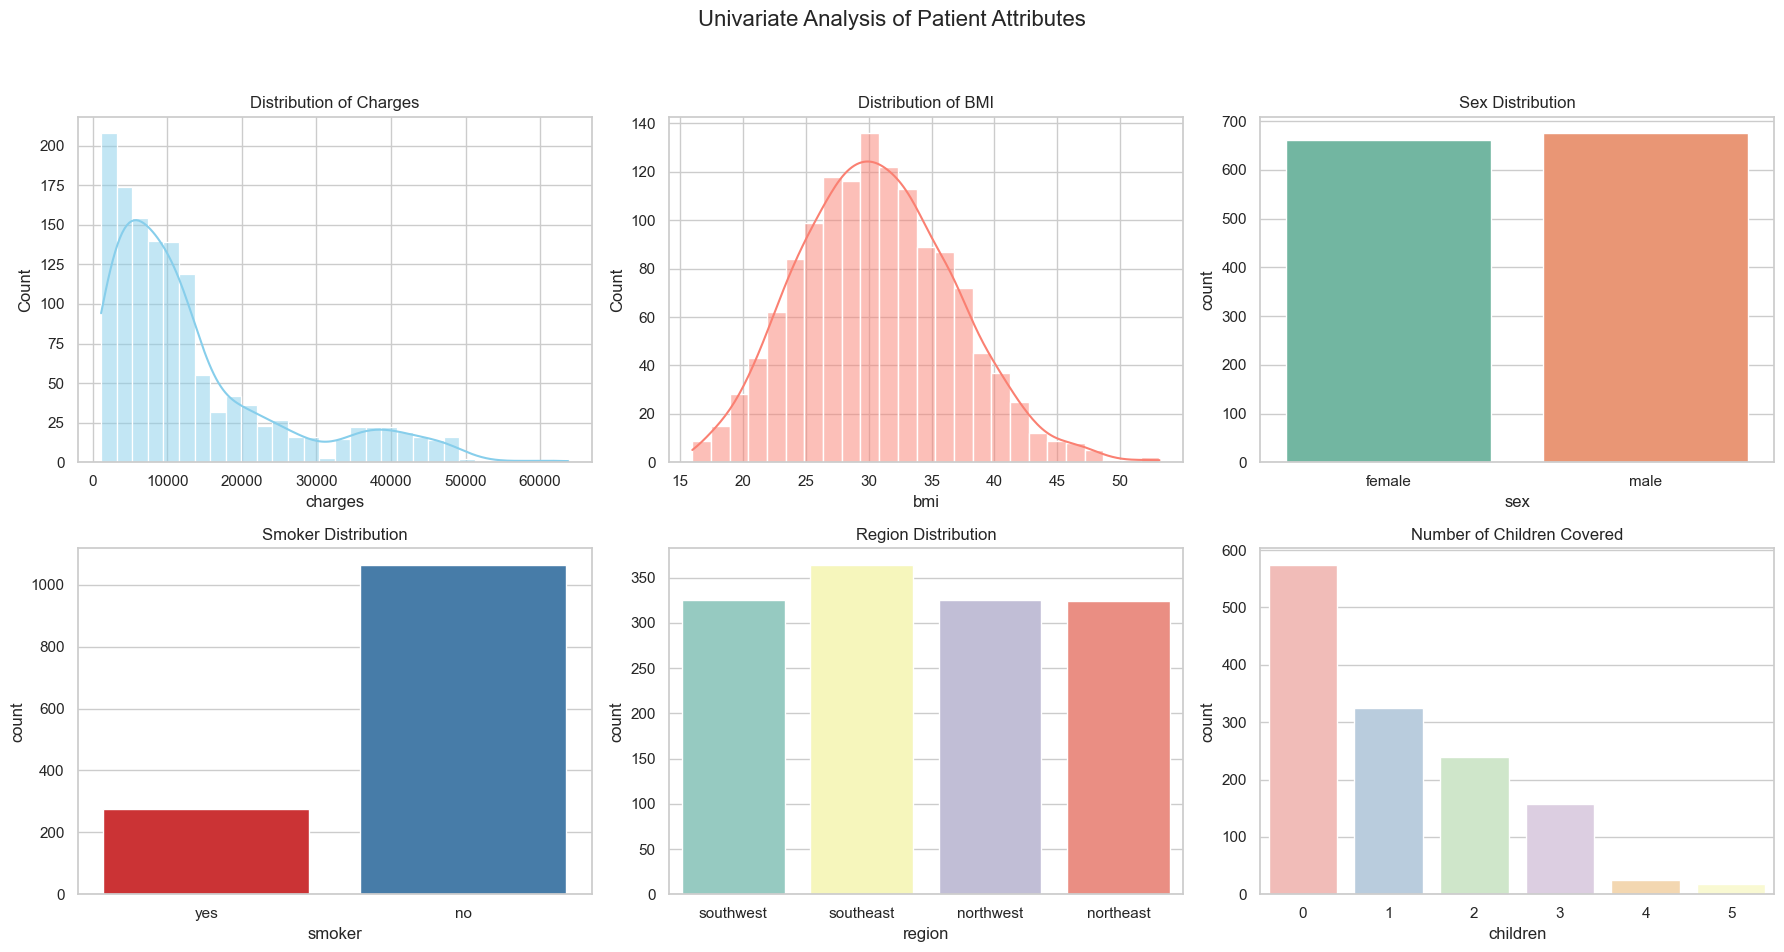

In [ ]:
# Exploratory Data Analysis (EDA)

# figure grid
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Univariate Analysis of Patient Attributes', fontsize=16)

# Histogram of Charges
sns.histplot(df['charges'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Charges')

# Histogram of BMI
sns.histplot(df['bmi'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of BMI')

# Countplot of Sex
sns.countplot(x='sex', data=df, ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Sex Distribution')

# Countplot of Smoker
sns.countplot(x='smoker', data=df, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Smoker Distribution')

# Countplot of Region
sns.countplot(x='region', data=df, ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Region Distribution')

# Countplot of Children
sns.countplot(x='children', data=df, ax=axes[1, 2], palette='Pastel1')
axes[1, 2].set_title('Number of Children Covered')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observations from Univariate Analysis

- **Charges** are heavily right-skewed, meaning most people pay relatively low amounts, but a few have very high medical costs. This might affect modeling later, so I may consider log-transforming this variable.
- **BMI** is roughly normally distributed, centered around 30, but with a slight right tail. There are a few people with extremely high BMI values.
- **Smoker** status is unbalanced. There are a lot more non-smokers than smokers. However, this could be a very important variable when it comes to predicting cost.
- **Children** shows that most people have 0 or 1 child listed. Very few have 4 or 5 children, so this feature might not carry as much weight in prediction.
- **Region** is relatively balanced, which is good. It means we won't have to worry about one region dominating the results.
- **Sex** is also evenly split between male and female, so no adjustments needed there either.


## Bivariate Analysis Of Categorical And Numerical Features

###  Charges by Smoker Status (Barplot)

C:\Users\James\AppData\Local\Temp\ipykernel_30560\4240204479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_charges, x='smoker', y='charges', palette='pastel')


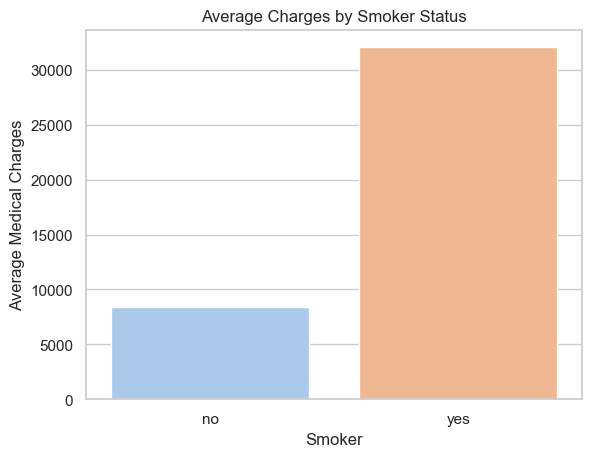

In [ ]:
# Group by smoker status and calculate average charges
avg_charges = df.groupby('smoker')['charges'].mean().reset_index()

# Bar plot using seaborn
sns.barplot(data=avg_charges, x='smoker', y='charges', palette='pastel')
plt.title('Average Charges by Smoker Status')
plt.ylabel('Average Medical Charges')
plt.xlabel('Smoker')
plt.show()

#### Observation
This chart shows that smokers, on average, incur **much higher medical charges** than non-smokers. The difference is substantial, suggesting smoking is one of the most influential factors in predicting healthcare costs.

### Box Plot of Charges by Smoker Status

C:\Users\James\AppData\Local\Temp\ipykernel_30560\160405725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')


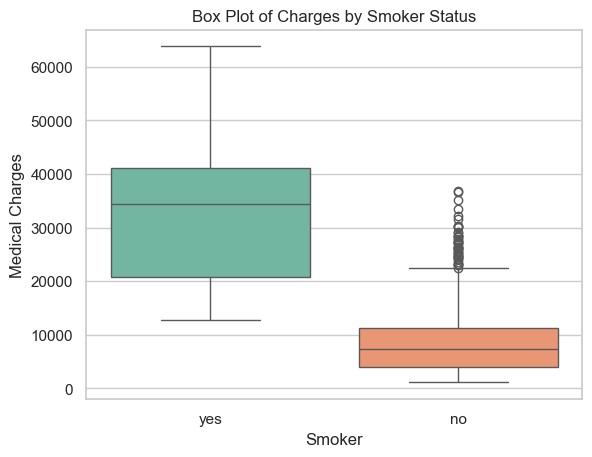

In [15]:
# Group by smoker status and calculate average charges
avg_charges = df.groupby('smoker')['charges'].mean().reset_index()

sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title('Box Plot of Charges by Smoker Status')
plt.ylabel('Medical Charges')
plt.xlabel('Smoker')
plt.show()


#### Observation
This box plot shows that **smokers generally incur significantly higher medical charges** than non-smokers. While the median cost for smokers is much higher, it's also clear that **some non-smokers have high charges as well**, as seen by the presence of many outliers. This suggests that although smoking is a strong cost driver, other factors such as age or chronic conditions may also play a role in healthcare costs for non-smokers.


### Charges Vs Age By Smoker Status Scatterplot

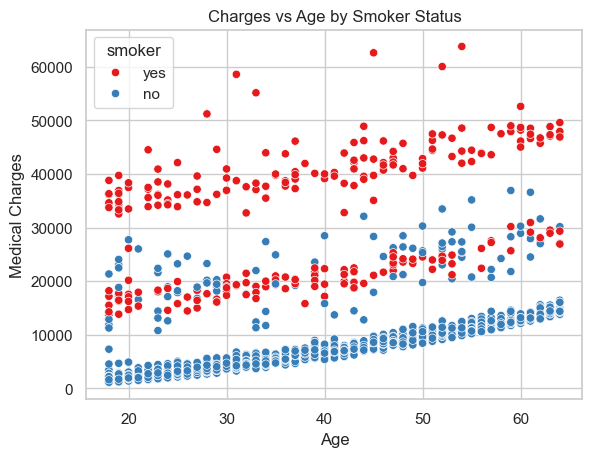

In [16]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='Set1')
plt.title('Charges vs Age by Smoker Status')
plt.ylabel('Medical Charges')
plt.xlabel('Age')
plt.show()

#### Observation
This scatter plot shows a clear trend where **medical charges increase with age**, especially for non-smokers. Among smokers, charges tend to be **consistently high** across all age groups, suggesting that smoking has a strong impact on healthcare costs regardless of age. The gap between smokers and non-smokers is quite noticeable with many young smokers incurring costs similar to or even higher than older non-smokers.

### Changes Vs BMI By Smoker Status Scatterplot

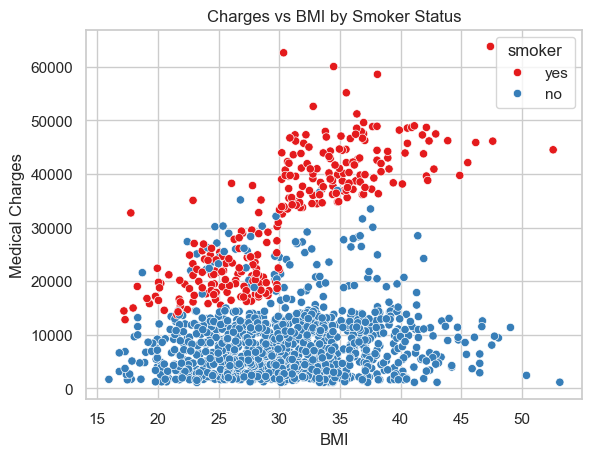

In [20]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='Set1')
plt.title('Charges vs BMI by Smoker Status')
plt.ylabel('Medical Charges')
plt.xlabel('BMI')
plt.show()

#### Observation
This scatter plot shows that BMI alone isn't a strong predictor of medical charges for non-smokers. Their costs remain relatively consistent across BMI values. However, for smokers, BMI appears to **amplify** medical charges. Smokers with a BMI over 30 tend to have some of the **highest healthcare costs** in the dataset, suggesting a possible interaction effect between smoking and BMI.

### Correlation Heatmap

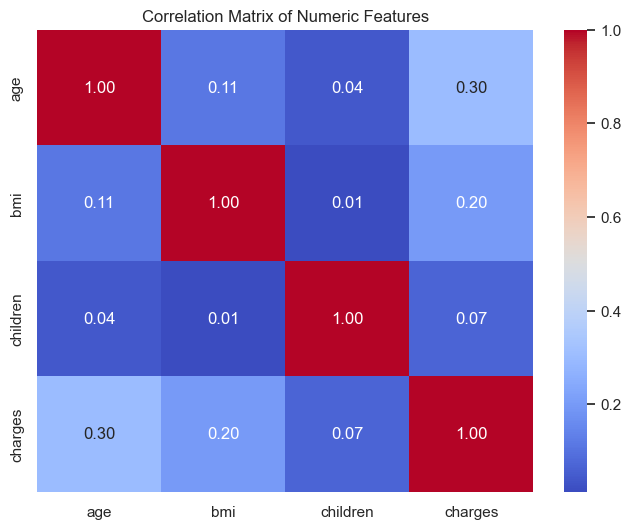

In [23]:
# Correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Observation
From the correlation heatmap, we can see that:
- `age` has the strongest positive correlation with `charges` (**0.30**)
- `bmi` has a weaker correlation (**0.20**)
- `children` has almost no correlation (**0.07**)

Interestingly, none of the numeric features alone are very strong predictors of charges. This supports what we saw earlier: **categorical features like `smoker` may have more predictive power**.

## EDA Summary

After exploring the data, here are a few key things we noticed:

- **Smoker status** has the biggest impact on medical charges. Smokers tend to pay way more than non-smokers, no matter their age or BMI.
- **Age** is also related to higher charges. As people get older, their medical costs generally go up. This trend was especially noticeable for non-smokers.
- **BMI** by itself doesn’t seem super important for predicting charges, but for smokers with a high BMI, costs get really high.
- The number of **children** a person has doesn’t seem to affect charges much.
- We also saw that the distribution of charges is very **skewed**. Most people pay lower amounts, but a few get charged a lot more.
- The **correlation heatmap** backed this up: age has the strongest numeric correlation with charges, but overall, none of the numeric features are super strongly related on their own.

This gives us a better idea of what matters when predicting charges, and what we might want to focus on when building our model.
